In [1]:
import scanpy as sc
import seaborn as sns

from pf2barcode.imports import import_CCLE

X = import_CCLE()

/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [2]:
Xsel = X[:, X.var.index.str.contains("AXL")]
Xsel.uns

{'pca': {'params': {'zero_center': True,
   'use_highly_variable': False,
   'mask_var': None},
  'variance': array([19.43747651, 10.21894986,  7.18932067,  4.84639238,  3.1443771 ,
          2.98255997,  2.61459366,  2.23094505,  2.20021238,  2.07758423,
          1.94217491,  1.86826072,  1.82087975,  1.78409634,  1.7299682 ,
          1.70664204,  1.6500219 ,  1.62289631,  1.58015074,  1.57155409,
          1.56140989,  1.53829656,  1.52403708,  1.5022633 ,  1.49598535,
          1.49234706,  1.48736524,  1.4667707 ,  1.46519013,  1.4560538 ]),
  'variance_ratio': array([0.01921387, 0.01010139, 0.00710662, 0.00479064, 0.00310821,
         0.00294825, 0.00258452, 0.00220528, 0.0021749 , 0.00205368,
         0.00191983, 0.00184677, 0.00179993, 0.00176357, 0.00171007,
         0.00168701, 0.00163104, 0.00160423, 0.00156197, 0.00155348,
         0.00154345, 0.0015206 , 0.0015065 , 0.00148498, 0.00147878,
         0.00147518, 0.00147025, 0.0014499 , 0.00144833, 0.0014393 ])}}

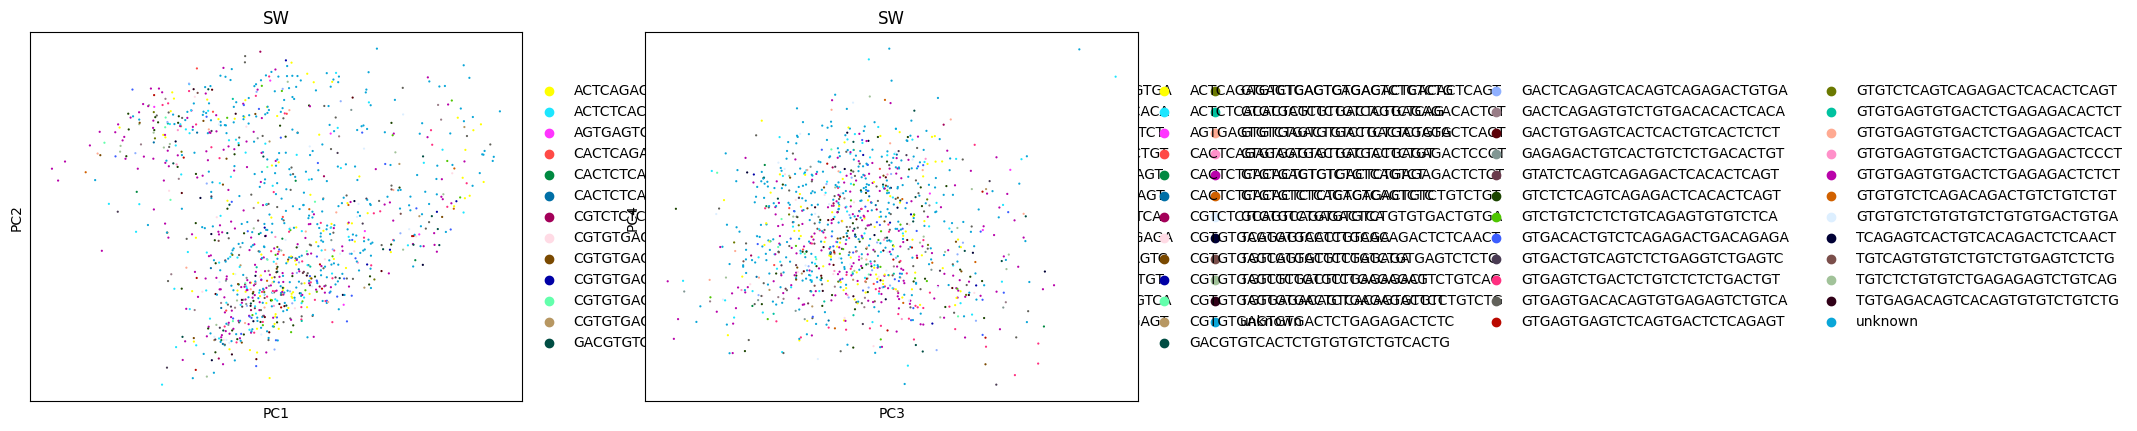

In [3]:
sc.pl.pca(X, color="SW", components=["1,2", "3,4"], size=10)

Text(0, 0.5, '-log10(p-value)')

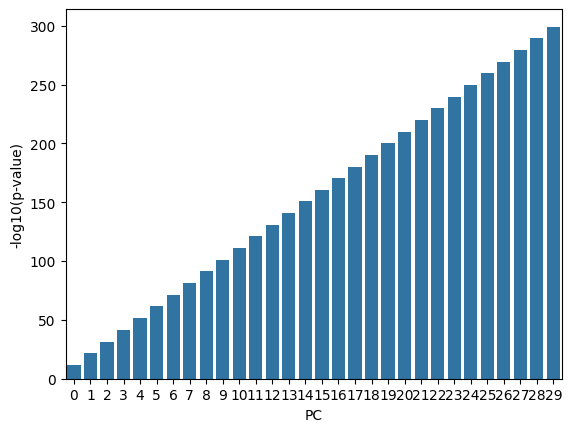

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal

idx_selected = 0
cells = []
pvalues = np.zeros(X.obsm["X_pca"].shape[1])

for jj in range(X.obsm["X_pca"].shape[1]):
    for barcodes in X.obs["SW"].unique():
        cells_selected = X.obsm["X_pca"][X.obs["SW"] == barcodes, idx_selected]
        cells.append(cells_selected.flatten())

    pvalues[jj] = kruskal(*cells).pvalue

sns.barplot(x=np.arange(pvalues.shape[0]), y=-np.log10(pvalues))
plt.xlabel("PC")
plt.ylabel("-log10(p-value)")

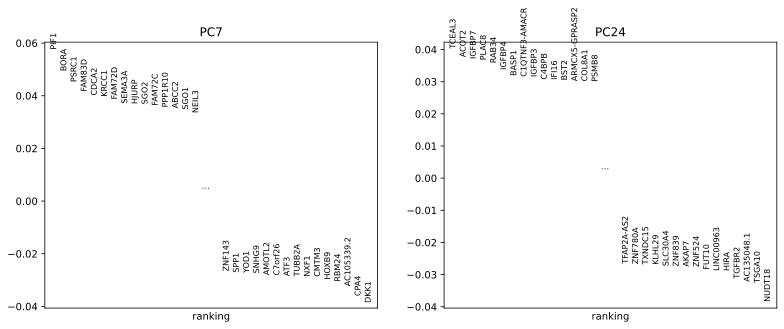

In [8]:
sc.pl.pca_loadings(X, components="7,24")

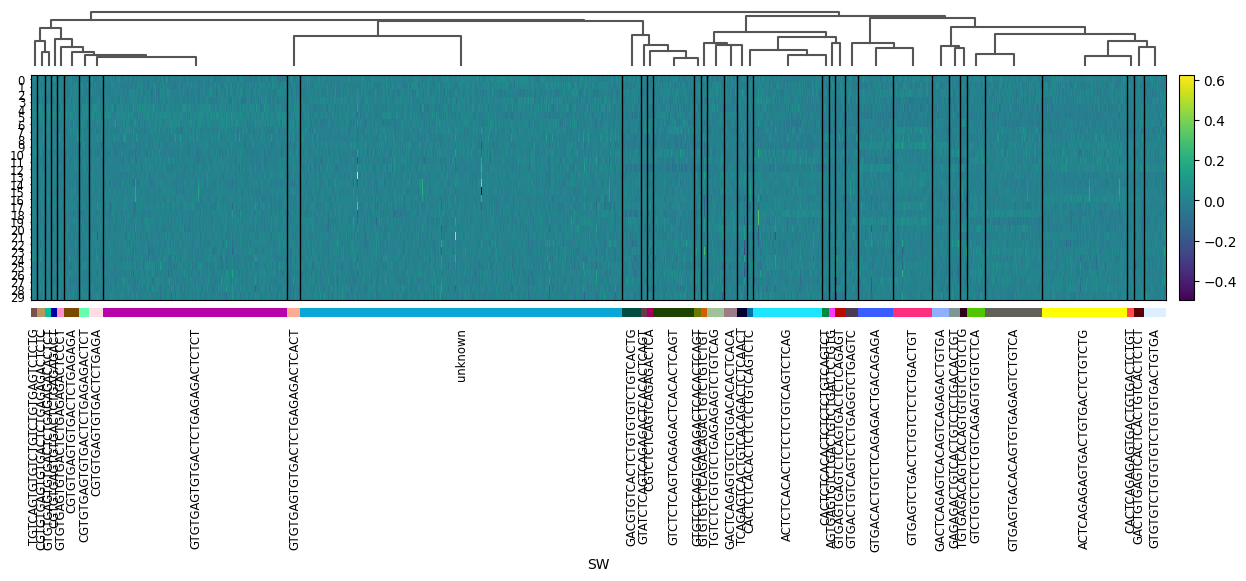

In [6]:
import anndata

pcann = anndata.AnnData(
    X.obsm["X_pca"],
    var=[f"PC {ii}" for ii in range(X.obsm["X_pca"].shape[1])],
    obs=X.obs,
)
pcann.X /= np.linalg.norm(pcann.X, axis=0)

sc.pl.heatmap(
    pcann,
    pcann.var_names,
    groupby="SW",
    dendrogram=True,
    swap_axes=True,
    figsize=(15, 4),
)

In [7]:
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

df = pd.DataFrame(pcann.X, columns=pcann.var_names, index=pcann.obs_names)
df["SW"] = pcann.obs["SW"]
df = df[df["SW"] != "unknown"]

sns.pairplot(df, hue="SW", height=1.25, plot_kws={"s": 5}, corner=True);

/tmp/ipykernel_3977833/2049082153.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ce2f405f1a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 